<a href="https://colab.research.google.com/github/Catherine-H1/Predicting-Student-Grades/blob/main/7_23_2021_Grades_Linear_Regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I used the Student Performance Dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [ ]:
from google.colab import drive

In [ ]:
#Connects Google Drive to the Google Colab Notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Getting our data
data = pd.read_csv('/content/drive/MyDrive/AI/Grades Data/student-por.csv', sep = ';')

In [ ]:
#Looking at the contents of the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
#Determining the length of the data
len(data)

649

In [ ]:
#Get the types of my data
#print(data.types())
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Based on this information: 
data.describe()

#No data is missing
#On average, people are 16-17 years old
#On average, mothers have education from 4-9th grade and secondary education
#On average, fathers have a slightly lower education
# Max travel time is 4, but most seeem to  travel 1 mile
#Most study for 1-2 hours, max is 4, min is 1
#Most have never failed, max is 3
#famrel 1(bad) to 5 (excelent) Most don't seem to have a good family relationship
#freetime (1 low) to 5 (very high) Most seem to be average (3)
#goout (going out with friends) 1(low) to 5(high): Most seemt average, but could be slightly less than freetime
#Dalc (weekday alcohol consumption) from 1(low) to 5(high): most seem to not consume a lot of alcohol during the weekday
#Walc (weekend alcohol consumption): slightly higher than dalc (avg = 2.28)
#health: (1 (very bad) to 5 (very good)): some seem to be slightly in the worsening side (avg = 3.5)
#absences (numeric from 0-93): avg = 3.5-4, max is 32
#G1 and G2, mostly the same, G2 is slightly higher
#Final grade is on average 11.9

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


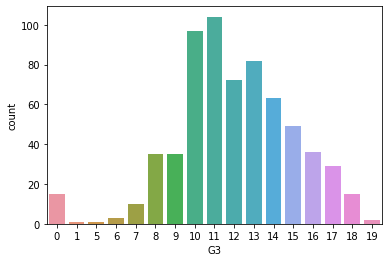

In [ ]:
#Looking at the sum of different scores
sns.countplot(data['G3'])

# **Are G1 and G2 correlated to G3?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


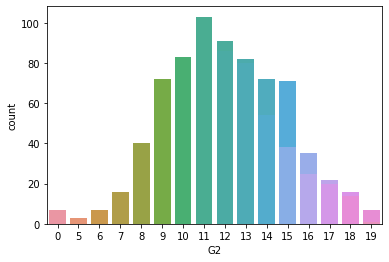

In [ ]:
#Looking at the counts for both G1 and G2
sns.countplot(data['G1'])
sns.countplot(data['G2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


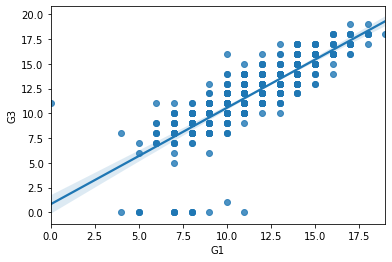

In [ ]:
#Other than a few outliers, they both overall seem correlated to G3
#from sklearn import  

x= data['G1']
y =data['G3']
sns.regplot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


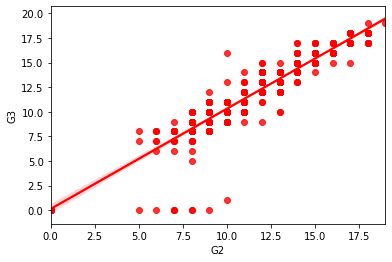

In [ ]:
x_g2 = data['G2']
sns.regplot(x_g2, y, color='red')

# **How do age, gender, and family relations determine one's G3 grade?**

**First, I am exploring gender.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


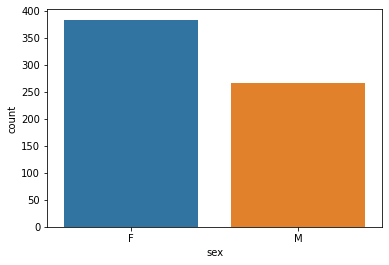

In [ ]:
#In general, this dataset seems to have more females than males
sns.countplot(data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


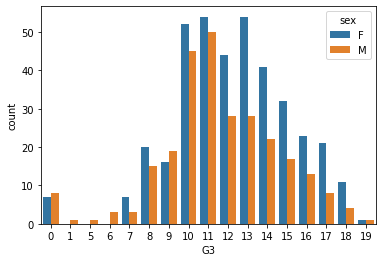

In [ ]:
#Judging by this, it seems like females are doing slightly better. Overall, there are more females than males in several categories
sns.countplot(data['G3'], hue=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


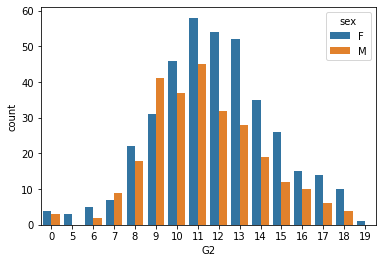

In [ ]:
sns.countplot(data['G2'], hue=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


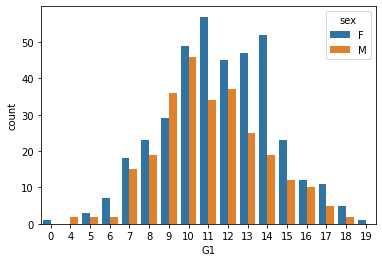

In [ ]:
sns.countplot(data['G1'], hue=data['sex'])

In [ ]:
#Based on this, the G3 score of females are slightly better with an average of 12.2, 0.85 points higher than males
data.groupby('sex')[['G3']].mean()
#females improved from G1 score by 0.6
#males by 0.3

,G3
sex,
F,12.253264
M,11.406015


In [ ]:
data.groupby('sex')[['G2']].mean() #0.6 difference with females higher
#females improved from G1 by 0.2, men by 0.15

,G2
sex,
F,11.822454
M,11.206767


In [ ]:
data.groupby('sex')[['G1']].mean() #0.6 difference with females higher

,G1
sex,
F,11.637076
M,11.056391


For both the G1, G2, and G3, the females scored better than males.
While the difference of average scores was about the same from the G1 score to the G2 score, females' improvement of G3 scores from the G2 scores was double (0.43 points) of that of males (0.2 points)

**Next, I will explore age.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


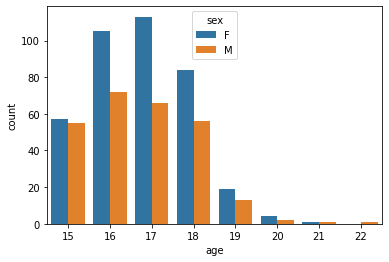

In [ ]:
#There seem to be mostly 16 and 17 year olds
sns.countplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


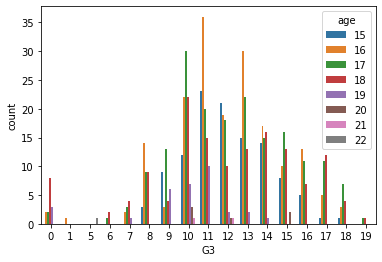

In [ ]:
#Let's see where each age scored in the G3
sns.countplot(data['G3'], hue=data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; y

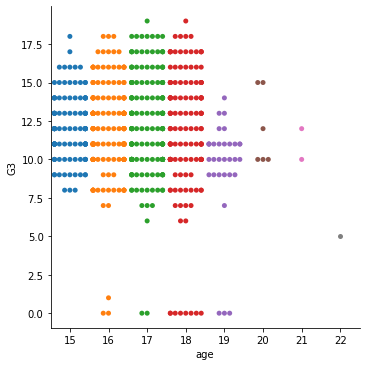

In [ ]:
#Generally, younger people (18 and under) do better
#17, and 18 year olds seem to perform the best
sns.catplot(x='age', y='G3', data=data, kind='swarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


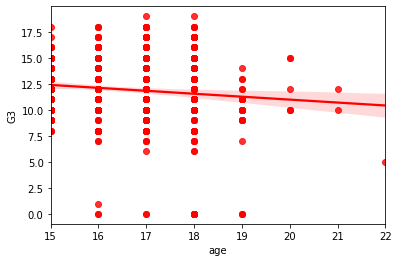

In [ ]:
sns.regplot(data['age'], y, color='red')
#Overall, it doesn't seem to be as good of an indicator as G1 and G2 scores

I will see if age and sex will contribute to scores

In [ ]:
#data.groupby('age')[['G3']].mean()
table = pd.pivot_table(data, index=['sex', 'age'], values=['G3'])
table

#On average, females scored highest at ages 16 and 17, whereas males scored highest at ages 15 and 20

G3
sex age           
F   15   12.000000
    16   12.419048
    17   12.884956
    18   12.047619
    19    9.368421
    20   11.750000
    21   12.000000
M   15   12.218182
    16   11.375000
    17   11.212121
    18   11.357143
    19    9.769231
    20   12.500000
    21   10.000000
    22    5.000000

Next, I will look at how their address (urban or rural) affects their G3 scores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


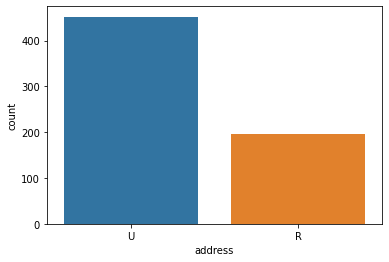

In [ ]:
sns.countplot(data['address'])
#2 times more people live in urban areas than rural areas.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


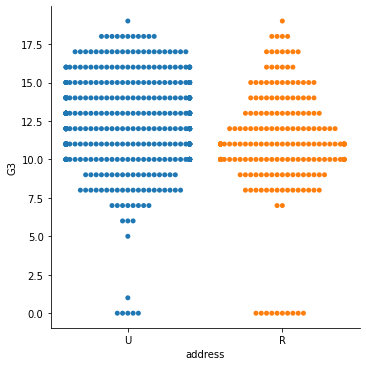

In [ ]:
sns.catplot(x='address', y='G3', data=data, kind='swarm')

In [ ]:
data.groupby('address')[['G3']].mean()
#On average, people living in rural areas score more than a point lower than people who live in urban areas.

,G3
address,
R,11.086294
U,12.263274


In [ ]:
table = pd.pivot_table(data, index=['sex', 'address', 'age'], values=['G3'])
table

#All together, it seems like females aged 17-18 who live in urban areas score better.


G3
sex address age           
F   R       15   11.608696
            16   12.580645
            17   12.027778
            18    9.958333
            19    7.250000
            20   13.500000
    U       15   12.264706
            16   12.351351
            17   13.285714
            18   12.883333
            19    9.933333
            20   10.000000
            21   12.000000
M   R       15   10.700000
            16   10.444444
            17   10.833333
            18   10.058824
            19    8.833333
            20   10.000000
            21   10.000000
    U       15   12.555556
            16   11.685185
            17   11.428571
            18   11.923077
            19   10.571429
            20   15.000000
            22    5.000000

# **How do one's desire to pursue a higher education, failure, and school support contribute to their G3 grades?**

First, I will look at the average scores of all these sections.

In [ ]:
for x in ['higher', 'schoolsup', 'failures']:
  print(data.groupby(x)[['G3']].mean())
#Based on this, it seems like higher education and no failures made the biggest difference in increasing one's G3 grade.

               G3
higher           
no       8.797101
yes     12.275862
                  G3
schoolsup           
no         11.979346
yes        11.279412
                 G3
failures           
0         12.510018
1          8.642857
2          8.812500
3          8.071429


**I will then look at higher.**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


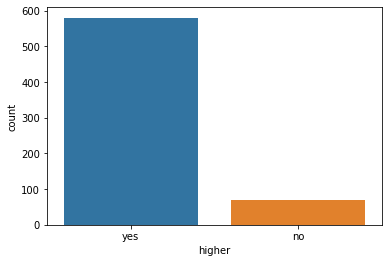

In [ ]:
sns.countplot(data['higher'])
#Most people want to pursue a higher education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


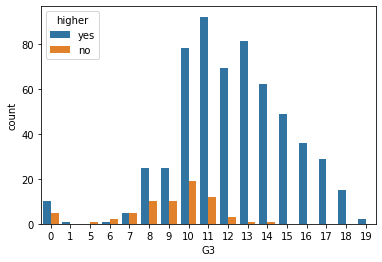

In [ ]:
sns.countplot(data['G3'], hue=data['higher'])
#People who scored 15 and up all wanted to pursue a higher education.

In [ ]:
table = pd.pivot_table(data, index=['address', 'higher'], values=['G3'])
table
#Based on this, it seems like people in both rural and urban areas who didn't want to pursue a higher education scored about the same (8.8)
#Whereas, when people living in both places wanted to pursue a higher education, people in urban areas scored around 1.1 points higher

G3
address higher           
R       no       8.750000
        yes     11.473373
U       no       8.829268
        yes     12.605839

**Next, I will look at failures.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


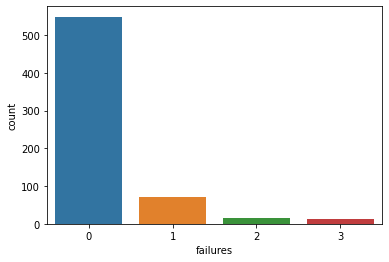

In [ ]:
sns.countplot(data['failures'])
#The majority of people have never failed a class

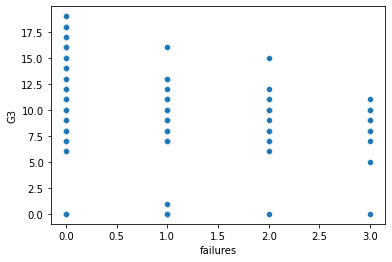

In [ ]:
sns.scatterplot(x='failures', y='G3', data=data)
#Maximum score decreases with each increase of a failed class

In [ ]:
table = pd.pivot_table(data, index=['higher', 'failures'], values=['G3'])
table
#People who want to pursue a higher degree do significantly better than those who don't, despite how many times they've failed.

G3
higher failures           
no     0          9.888889
       1          7.800000
       2          7.857143
       3          6.666667
yes    0         12.693957
       1          8.980000
       2          9.555556
       3          9.125000

**Next, I will look at school support.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


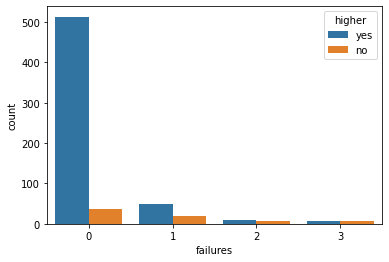

In [ ]:
sns.countplot(data['failures'], hue=data['higher'])
#Most people who want to pursue a higher degree don't fail. However there are some who have failed who still want to pursue a higher degree.

In [ ]:
data.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


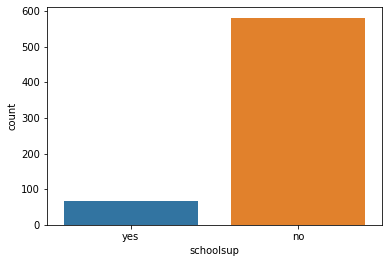

In [ ]:
sns.countplot(data['schoolsup'])
#Most people don't have school support.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


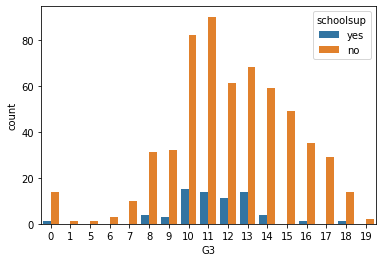

In [ ]:
sns.countplot(data['G3'], hue=data['schoolsup'])

In [ ]:
table = pd.pivot_table(data, index=['higher','schoolsup'], values=['G3'])
table
#People who didn't want to pursue a higher education but had school support tended to score higher than people who didn't have school support.
#However, people who wanted to pursue a higher education but had no school support tended to score, on average, 1 point higher than those who did have school support

G3
higher schoolsup           
no     no          8.761194
       yes        10.000000
yes    no         12.398833
       yes        11.318182

In [ ]:
table = pd.pivot_table(data, index=['higher', 'schoolsup', 'failures'], values=['G3'])
table

#People who 

G3
higher schoolsup failures           
no     no        0          9.888889
                 1          7.684211
                 2          7.857143
                 3          6.000000
       yes       1         10.000000
                 3         10.000000
yes    no        0         12.852747
                 1          8.681818
                 2          9.750000
                 3          9.285714
       yes       0         11.448276
                 1         11.166667
                 2          8.000000
                 3          8.000000

# **Next, I will train the data using Linear Regression**

In [ ]:
#Convert data into ints

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the higher column
for x in ['higher', 'schoolsup', 'sex', 'address']:
  data.iloc[:, data.columns.get_loc(x)] = labelencoder.fit_transform(data.iloc[:, data.columns.get_loc(x)].values)
  print(data[x].unique())


#1 = yes, 0 = no
#1 = male, 0= female

[1 0]
[1 0]
[0 1]
[1 0]


In [ ]:
#Splitting the data into training and testing data
#'schoolsup',
#X = data[['higher', 'sex', 'address', 'G1', 'G2', 'failures', 'schoolsup', 'age']]
#X = data[['G1', 'G2']]
X = data[['G1', 'G2', 'sex']]
#X = data[['higher', 'sex', 'address', 'failures', 'schoolsup', 'age']]
y = data['G3']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)
r2_score(y_pred, y_test)

#With all of the data I explored, there was an R2 score of 0.826
#With only the G1 and G2 data, there was an R2 score of 0.834
#With G1, G2, and sex data, there was an R2 score of 0.836
#Without the G1 and G2 data, the model performed significantly worse

0.8361620113291616

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Grade')

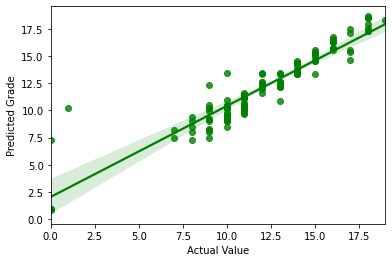

In [ ]:
#Visualize test score
#plt.scatter(X_train, y_train, color = "red")
sns.regplot(y_test, y_pred, color='green')


#plt.scatter(y_test, y_pred, color = "green")
#plt.title("Salary vs Experience (Training set)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Grade")
#plt.show()

# **To summarize, G1 and G2 grades were the biggest indicators of students' G3 grades**


